# **Random Forest**

### **Import**

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

### **Load the Data**

In [42]:
df = pd.read_csv('../cleaned_data.csv')

## **Model Training**

### **Model 1: All Features**

In [43]:
X = df.drop(columns=['Addicted_Score']).values
y = df['Addicted_Score'].values

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=5)

In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(564, 11)
(564,)
(141, 11)
(141,)


In [46]:
rf = RandomForestClassifier(n_estimators=100, random_state=5)

In [47]:
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [48]:
y_pred = rf.predict(X_test)

In [49]:
metrics.accuracy_score(y_test, y_pred)

0.950354609929078

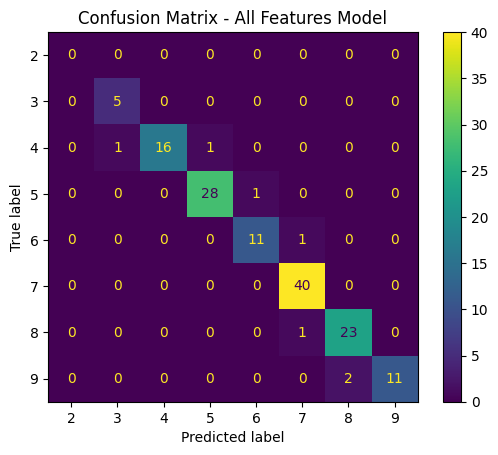

In [50]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=rf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=rf.classes_)
disp.plot()
plt.title('Confusion Matrix - All Features Model')
plt.show()

In [51]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.9528
Recall: 0.9504
F1-Score: 0.9501


### **Model 2: Selected Features**
**Features with > .5 positive or negative correlation**
- Conflicts_Over_Social_Media
- Mental_Health_Score
- Sleep_Hours_Per_Night
- Affects_Academic_Performance
- Avg_Daily_Usage_Hours

In [52]:
selected_features = ['Conflicts_Over_Social_Media', 'Mental_Health_Score', 
                     'Sleep_Hours_Per_Night', 'Affects_Academic_Performance', 
                     'Avg_Daily_Usage_Hours']

X_selected = df[selected_features].values
y_selected = df['Addicted_Score'].values

In [53]:
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, 
                                                                                        y_selected, 
                                                                                        test_size=0.2, 
                                                                                        random_state=5)

In [54]:
print(X_train_selected.shape)
print(y_train_selected.shape)
print(X_test_selected.shape)
print(y_test_selected.shape)

(564, 5)
(564,)
(141, 5)
(141,)


In [55]:
rf_selected = RandomForestClassifier(n_estimators=100, random_state=5)

In [56]:
rf_selected.fit(X_train_selected, y_train_selected)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [57]:
y_pred_selected = rf_selected.predict(X_test_selected)

In [58]:
metrics.accuracy_score(y_test_selected, y_pred_selected)


0.8794326241134752

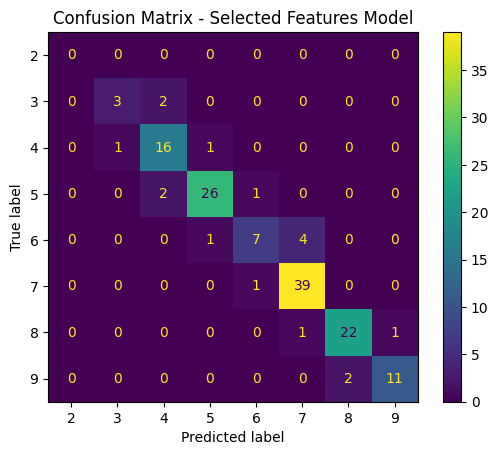

In [59]:
conf_matrix_selected = confusion_matrix(y_test_selected, y_pred_selected, labels=rf_selected.classes_)

disp_selected = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_selected,
                                       display_labels=rf_selected.classes_)
disp_selected.plot()
plt.title('Confusion Matrix - Selected Features Model')
plt.show()

In [60]:
precision = precision_score(y_test_selected, y_pred_selected, average='weighted')
recall = recall_score(y_test_selected, y_pred_selected, average='weighted')
f1 = f1_score(y_test_selected, y_pred_selected, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.8779
Recall: 0.8794
F1-Score: 0.8761


## **Model Accuracy Comparison**

In [61]:
results = []

acc1 = accuracy_score(y_test, y_pred)
prec1 = precision_score(y_test, y_pred, average='weighted')
rec1 = recall_score(y_test, y_pred, average='weighted')
f1_1 = f1_score(y_test, y_pred, average='weighted')
results.append(['Model 1: All Features', acc1, prec1, rec1, f1_1])

acc_sel1 = accuracy_score(y_test_selected, y_pred_selected)
prec_sel1 = precision_score(y_test_selected, y_pred_selected, average='weighted')
rec_sel1 = recall_score(y_test_selected, y_pred_selected, average='weighted')
f1_sel1 = f1_score(y_test_selected, y_pred_selected, average='weighted')
results.append(['Model 2: Selected Features', acc_sel1, prec_sel1, rec_sel1, f1_sel1])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Model 1: All Features,0.950355,0.952779,0.950355,0.950059
1,Model 2: Selected Features,0.879433,0.877894,0.879433,0.876101
